In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('./DataSets/student-mat.csv')

In [3]:
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [4]:
data.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

## Exploratory Data Analysis (EDA):

### Summary Statistics:

In [5]:
summary_stats = data.describe()
summary_stats

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


### Correlation Matrix

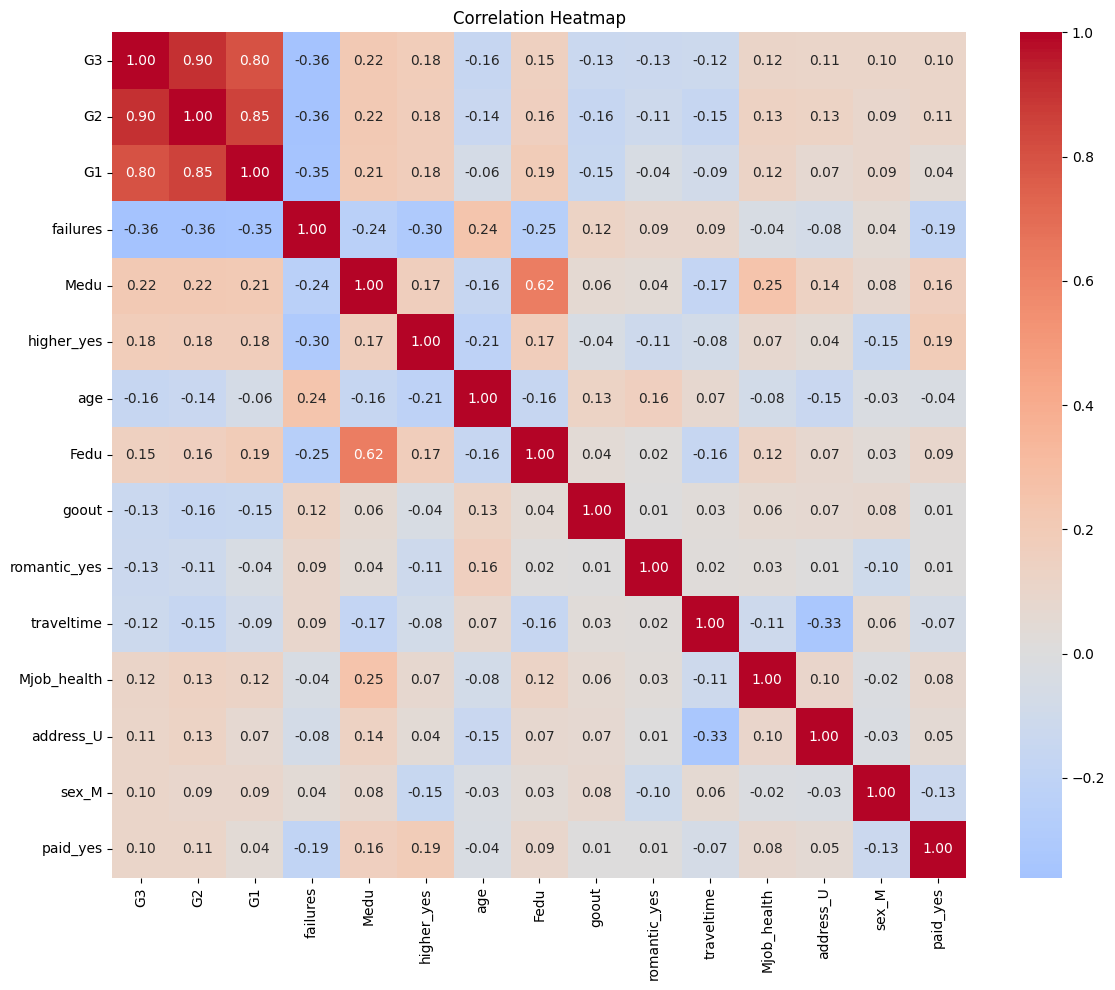

In [6]:
# Map original column names to more descriptive names
column_mapping = {
    'school': 'School',
    'sex': 'Gender',
    'address': 'Home Address',
    'famsize': 'Family Size',
    'Pstatus': 'Parent Cohabitation',
    'Mjob': 'Mother\'s Job',
    'Fjob': 'Father\'s Job',
    'reason': 'Reason for School Choice',
    'guardian': 'Guardian',
    'schoolsup': 'School Support',
    'famsup': 'Family Support',
    'paid': 'Paid Classes',
    'activities': 'Extra-curricular Activities',
    'nursery': 'Attended Nursery',
    'higher': 'Higher Education Aspiration',
    'internet': 'Internet Access',
    'romantic': 'Romantic Relationship'
}

# Encode categorical variables using one-hot encoding
encoded_data = pd.get_dummies(data, columns=list(column_mapping.keys()), drop_first=True)

# Calculate the correlation matrix
corr_matrix = encoded_data.corr()

# Choose a subset of columns for better visualization (optional)
subset_cols = corr_matrix['G3'].abs().sort_values(ascending=False).index[:15]
corr_matrix_subset = corr_matrix.loc[subset_cols, subset_cols]

# Plot the heatmap with descriptive column names
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix_subset, annot=True, cmap='coolwarm', fmt=".2f", center=0)
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

plt.show()

### Distribution of Categorical Variables:

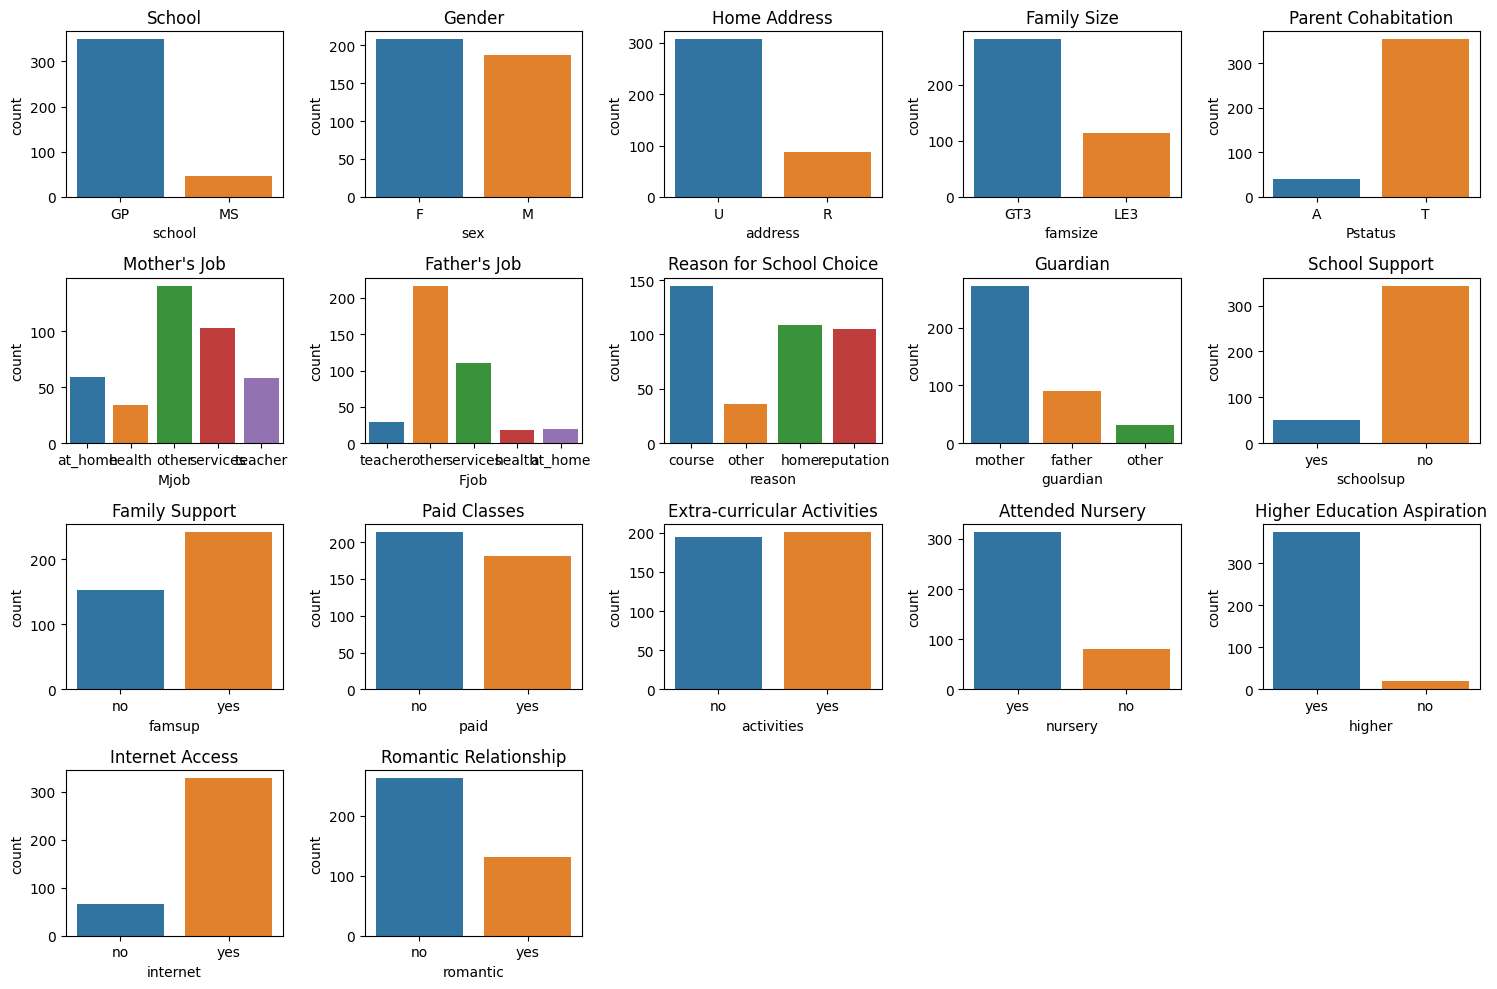

In [7]:
# Map original column names to more descriptive names
column_mapping = {
    'school': 'School',
    'sex': 'Gender',
    'address': 'Home Address',
    'famsize': 'Family Size',
    'Pstatus': 'Parent Cohabitation',
    'Mjob': 'Mother\'s Job',
    'Fjob': 'Father\'s Job',
    'reason': 'Reason for School Choice',
    'guardian': 'Guardian',
    'schoolsup': 'School Support',
    'famsup': 'Family Support',
    'paid': 'Paid Classes',
    'activities': 'Extra-curricular Activities',
    'nursery': 'Attended Nursery',
    'higher': 'Higher Education Aspiration',
    'internet': 'Internet Access',
    'romantic': 'Romantic Relationship'
}

# Choose categorical variables for count plots
cat_vars = list(column_mapping.keys())

plt.figure(figsize=(15, 10))
for i, var in enumerate(cat_vars, 1):
    plt.subplot(4, 5, i)
    sns.countplot(data=data, x=var)
    plt.title(column_mapping[var])  # Use descriptive column name as title
plt.tight_layout()
plt.show()


### Distribution of Numerical Features:

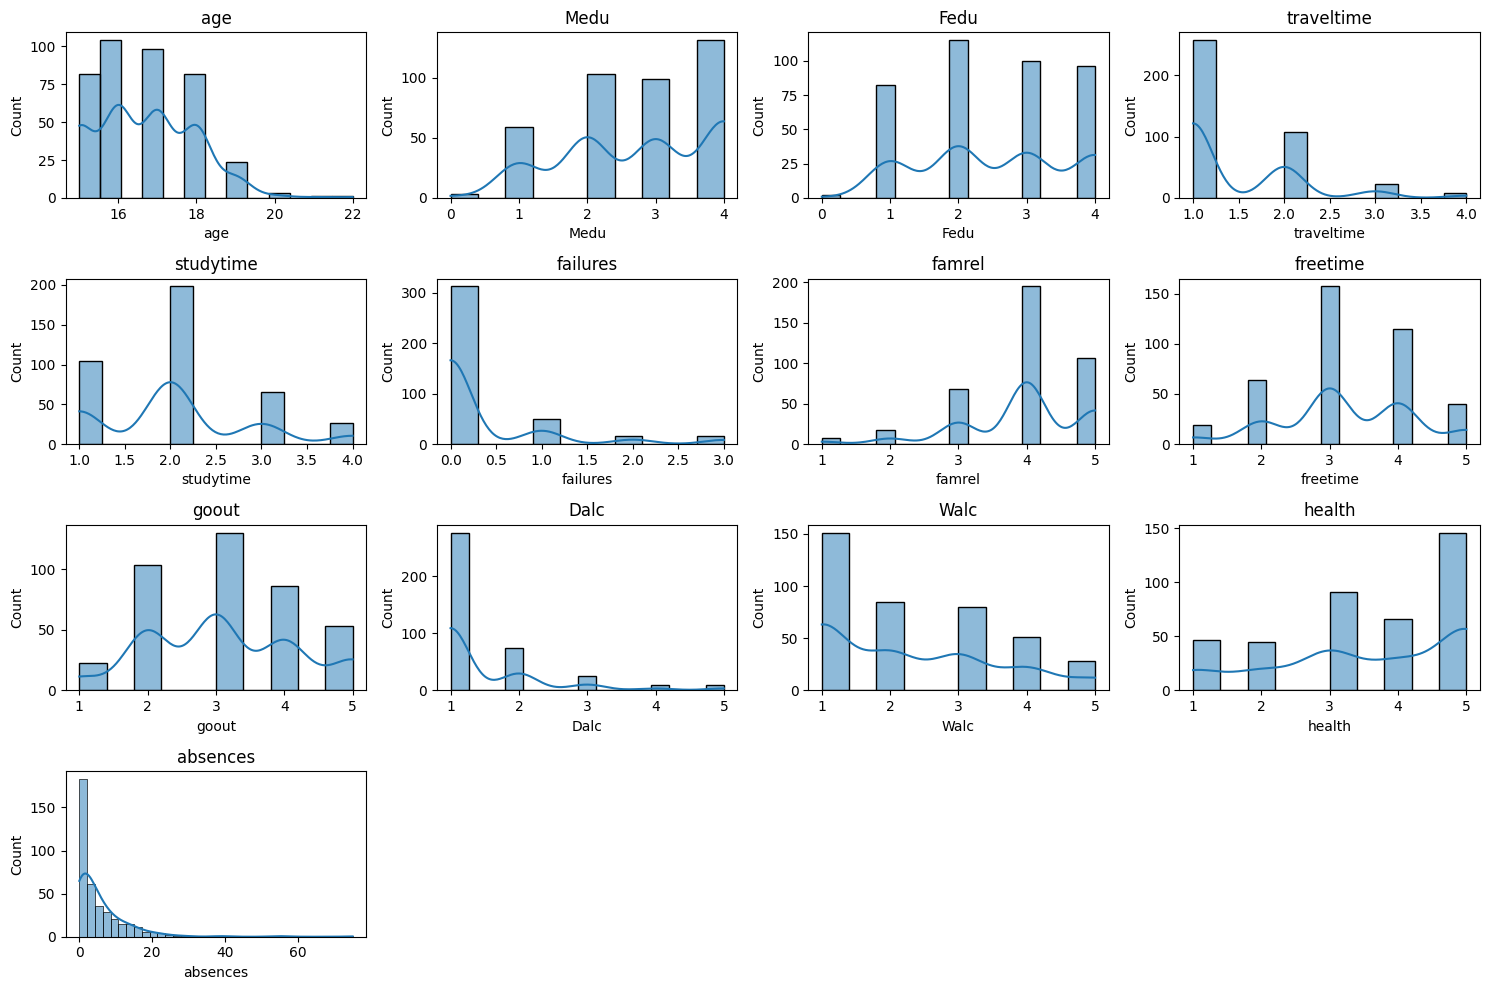

In [8]:
num_vars = ['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences']

plt.figure(figsize=(15, 10))
for i, var in enumerate(num_vars, 1):
    plt.subplot(4, 4, i)
    sns.histplot(data=data, x=var, kde=True)
    plt.title(var)
plt.tight_layout()
plt.show()


### Relationships with Numerical Features:

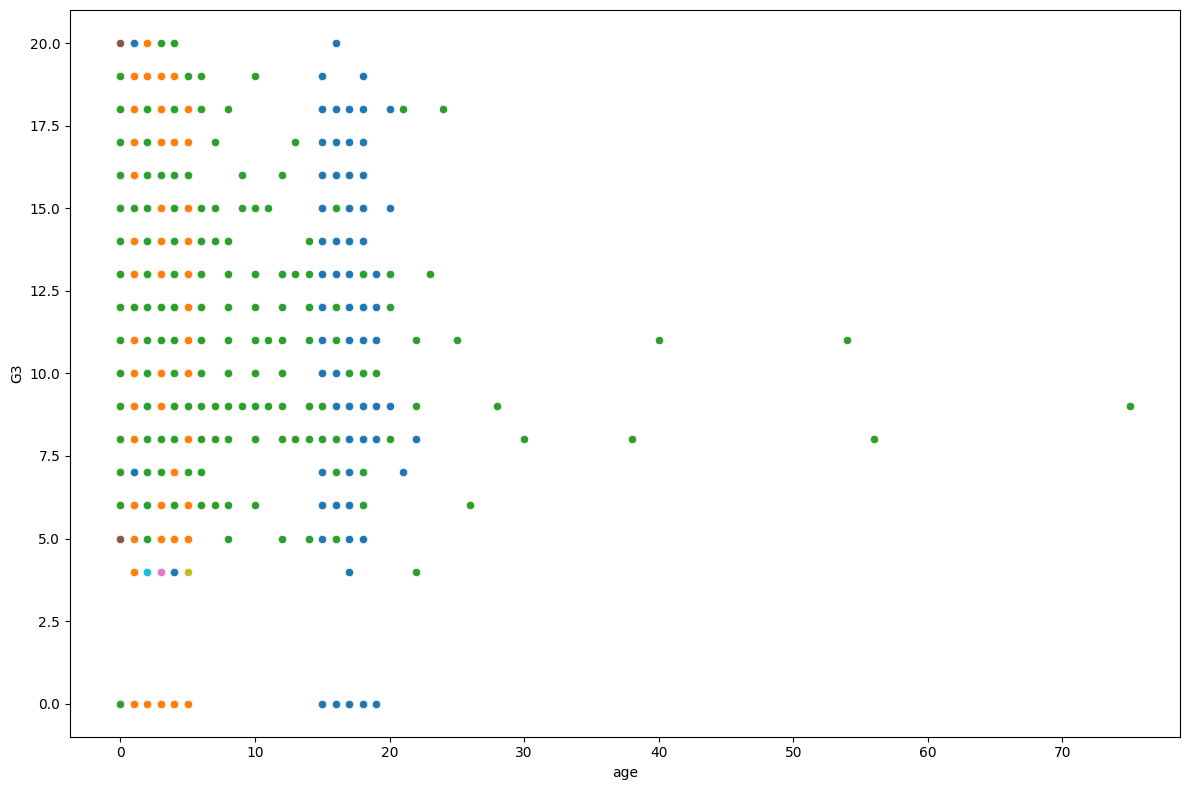

In [9]:
plt.figure(figsize=(12, 8))
for var in num_vars:
    sns.scatterplot(data=data, x=var, y='G3')
plt.tight_layout()
plt.show()

### Categorical Variable Insights:


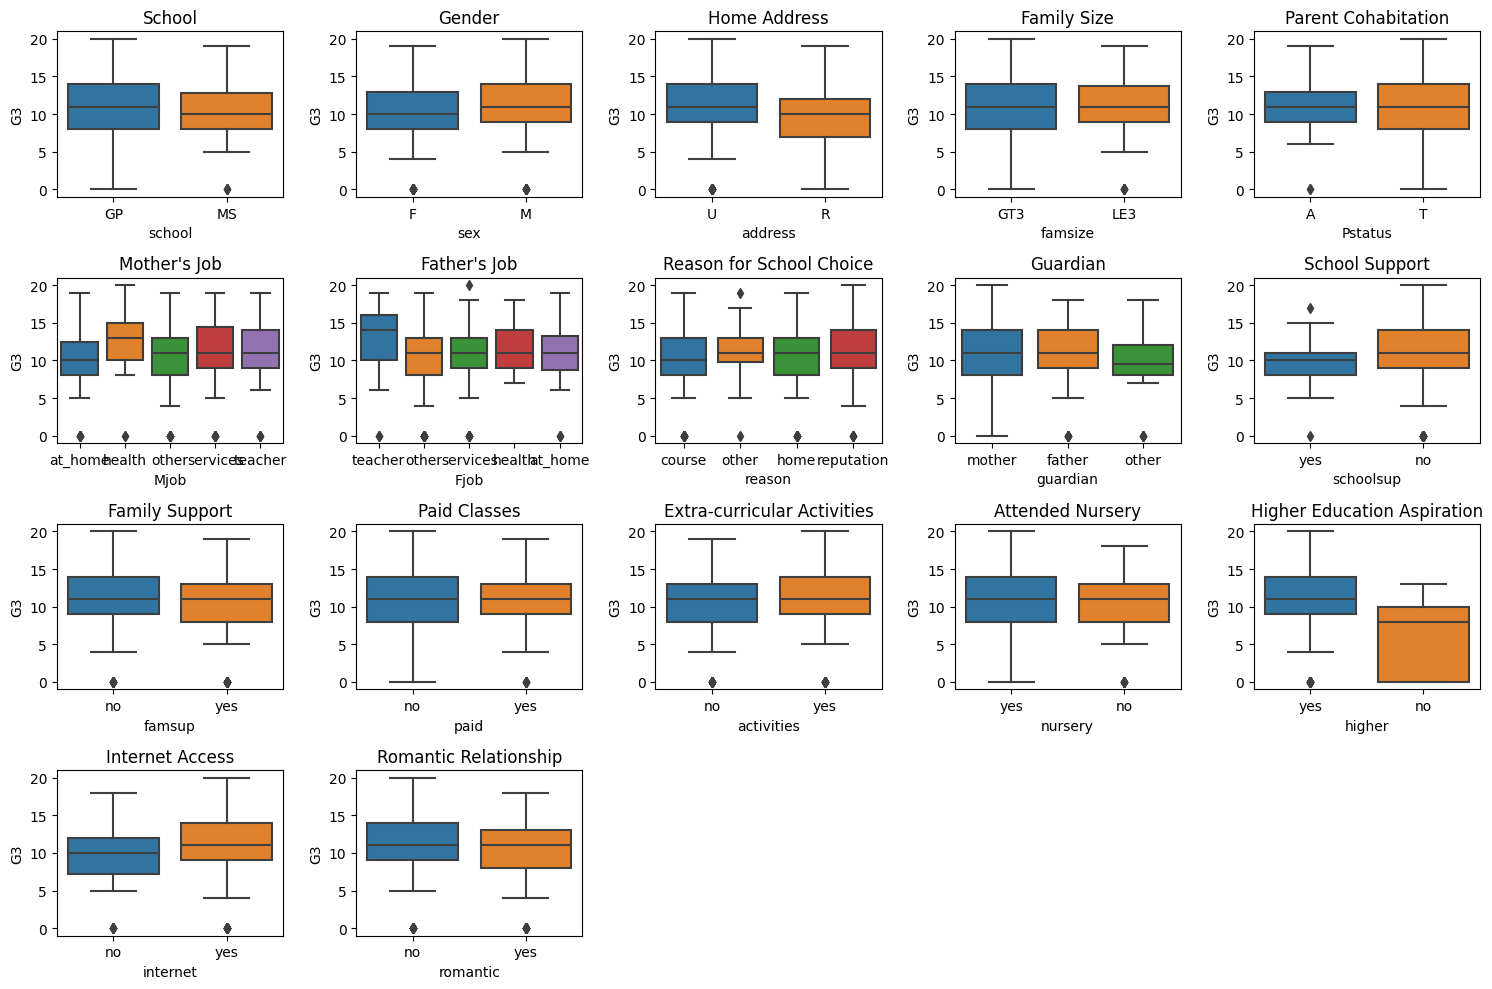

In [10]:
plt.figure(figsize=(15, 10))
for i, var in enumerate(cat_vars, 1):
    plt.subplot(4, 5, i)
    sns.boxplot(data=data, x=var, y='G3')
    plt.title(column_mapping[var])  # Use descriptive column name as title
plt.tight_layout()
plt.show()

### Correlation with G1 and G2:

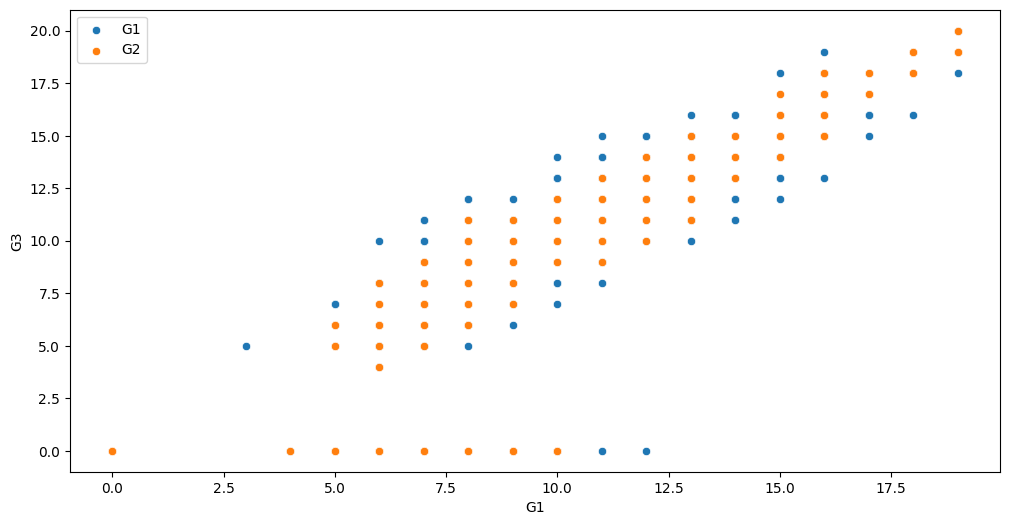

In [11]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=data, x='G1', y='G3', label='G1')
sns.scatterplot(data=data, x='G2', y='G3', label='G2')
plt.legend()
plt.show()

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [13]:
# Feature selection - choose relevant columns
selected_features = ['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences']

In [14]:
# Select features and target
X = data[selected_features]
y = data['G3']


In [15]:

# Encode categorical variables using one-hot encoding
X_encoded = pd.get_dummies(X, drop_first=True)


In [16]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

In [17]:
# Standardize features (scaling)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [18]:
def evaluate_regression_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    return mse, r2

In [19]:
# Initialize models
linear_reg = LinearRegression()
random_forest = RandomForestRegressor(random_state=42)
svr = SVR()


In [20]:
# Evaluate models
linear_reg_mse, linear_reg_r2 = evaluate_regression_model(linear_reg, X_train_scaled, y_train, X_test_scaled, y_test)
random_forest_mse, random_forest_r2 = evaluate_regression_model(random_forest, X_train_scaled, y_train, X_test_scaled, y_test)
svr_mse, svr_r2 = evaluate_regression_model(svr, X_train_scaled, y_train, X_test_scaled, y_test)

In [21]:

# Print MSE and R2 scores
print("Linear Regression - MSE:", linear_reg_mse, " R2:", linear_reg_r2)
print("Random Forest - MSE:", random_forest_mse, " R2:", random_forest_r2)
print("Support Vector Regression - MSE:", svr_mse, " R2:", svr_r2)

Linear Regression - MSE: 18.089574993693354  R2: 0.11779891276497823
Random Forest - MSE: 17.02212840207813  R2: 0.16985666116517972
Support Vector Regression - MSE: 17.346793857856326  R2: 0.1540232201819044
